In [4]:
from PIL import Image
from IPython.display import display 
import numpy as np
import torchvision.transforms as transforms

In [56]:
t = transforms.CenterCrop((160,320))

In [77]:
right_im = Image.open('../data/2020-10-14--09-02-25/train/episode_0000/RGBRight/000204.png')


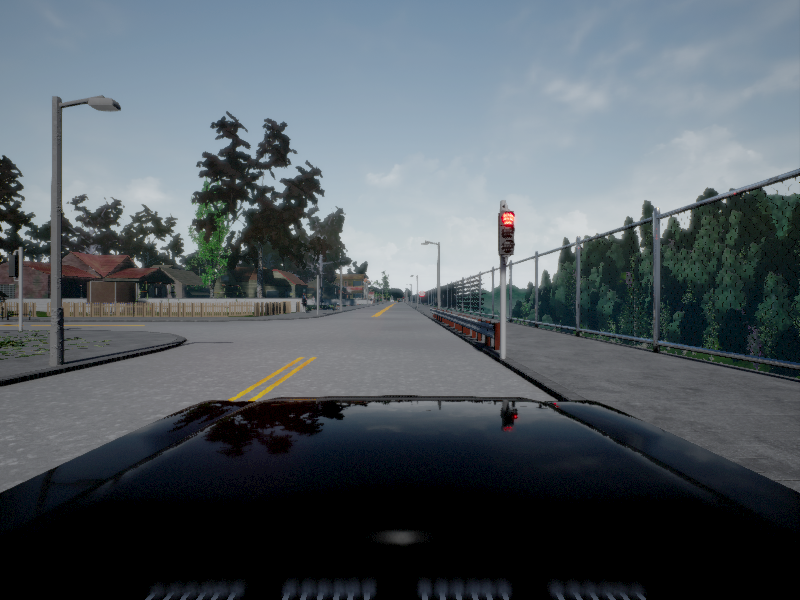

In [49]:
center_im = Image.open('../data/2020-10-14--09-02-25/train/episode_0000/RGBCenter/000204.png')
center_im

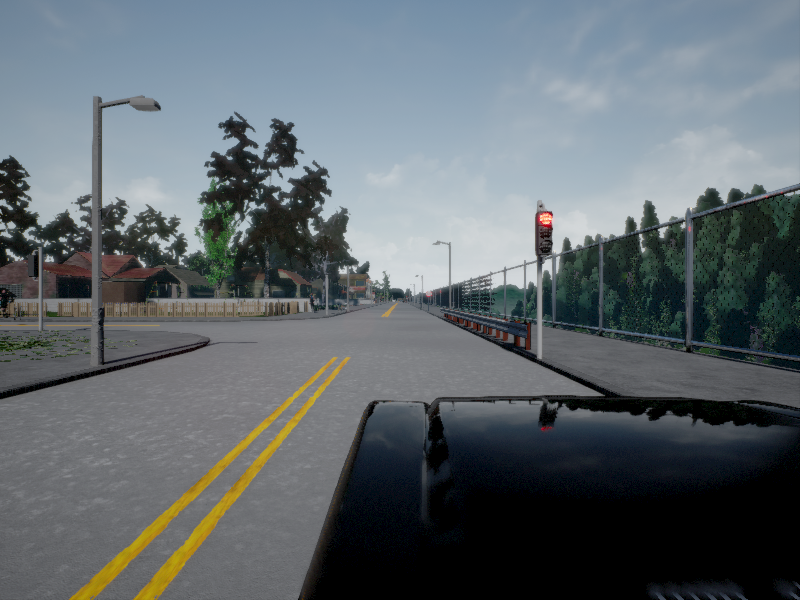

In [50]:
left_im = Image.open('../data/2020-10-14--09-02-25/train/episode_0000/RGBLeft/000204.png')
left_im

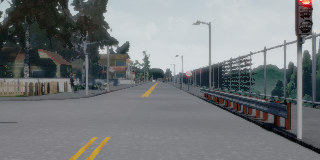

In [51]:
t(left_im)

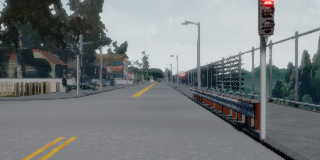

In [52]:
t(center_im)

In [18]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

In [119]:
np.random.uniform(-100,100)

80.34598180913866

In [126]:
x = np.random.uniform(-100,100)
y = 0

In [127]:
pa = [(0, 0), (800, 0), (800, 600), (0, 600)] # four vertices in the current plane
pb = [(-x, 0), (800-x, y), (800-x, 600-y), (-x, 600)] # four vertices in the resulting plane
pa, pb

([(0, 0), (800, 0), (800, 600), (0, 600)],
 [(-76.973457793482, 0),
  (723.026542206518, 0),
  (723.026542206518, 600),
  (-76.973457793482, 600)])

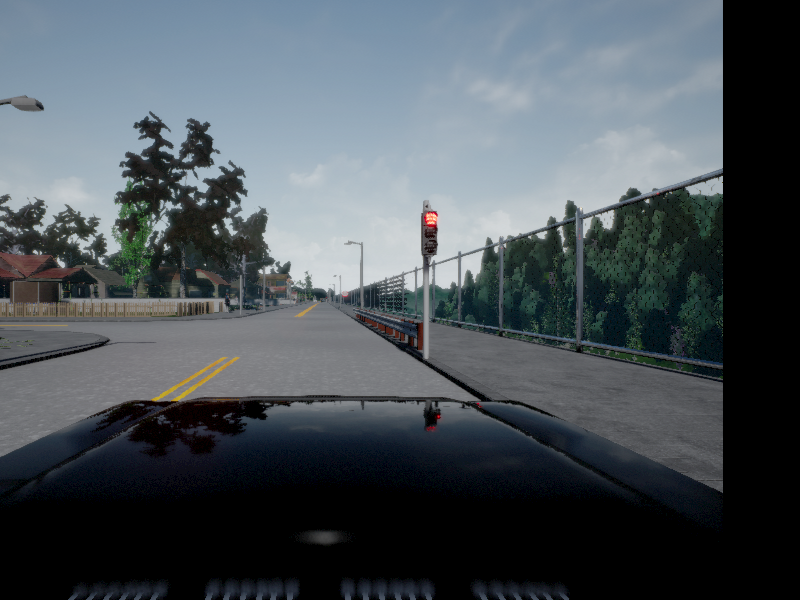

In [128]:
tim = center_im.transform((width, height), Image.PERSPECTIVE, find_coeffs(pb, pa), Image.BICUBIC)
tim

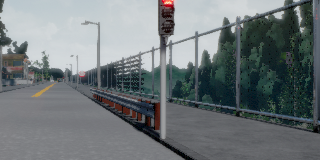

In [113]:
t(tim)

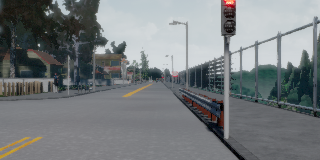

In [79]:
t(right_im)

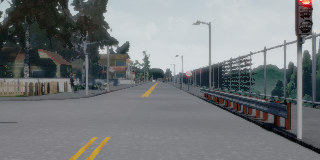

In [103]:
t(left_im)

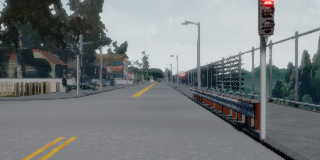

In [104]:
t(center_im)

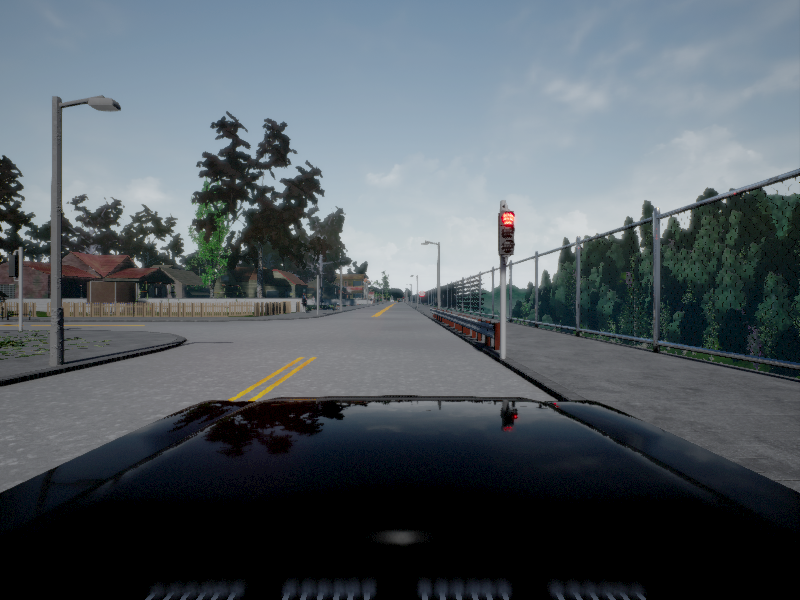

In [105]:
center_im

In [ ]:
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,steer_ang

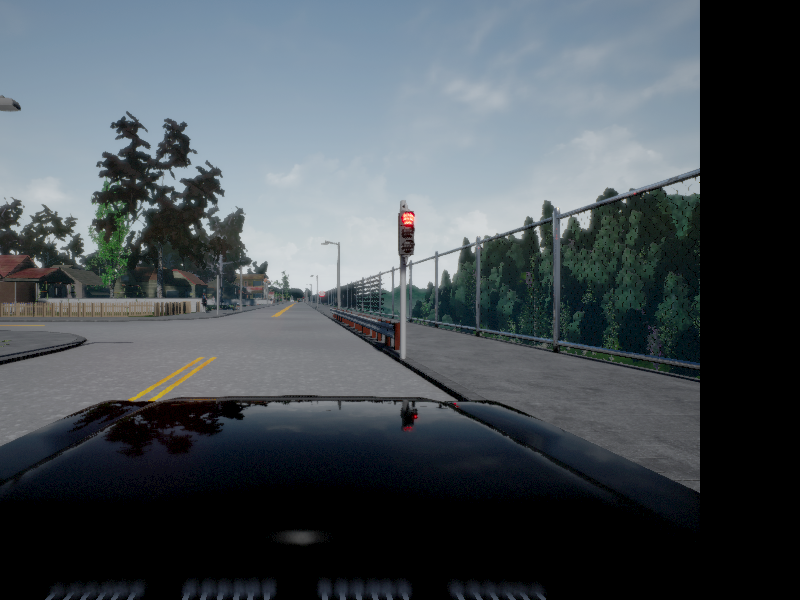

In [134]:
center_im.transform(center_im.size, Image.AFFINE, (1,0,100,0,1,0), Image.BICUBIC)

In [133]:
center_im.size()

TypeError: 'tuple' object is not callable